In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp
import json
dummy_fits = Polyfit('dummy_data/fits.npz', input_h5='dummy_data/inputdata.h5', order=3, covariance = True)
dummy_tune = Paramtune('dummy_data/fits.npz', 'dummy_data/target_data.json', 'sample_range', covariance = False)
dummy_tune_cov = Paramtune('dummy_data/fits.npz', 'dummy_data/target_data.json', 'sample_range', covariance = True)


Calculated inital guess:  [ 1.46338909 -0.98584734]                           
Tuned Parameters:  [ 1.48643043 -0.99134114] , Objective =  541.7278272419192 , chi2/ndf =  15.47793792119769
Covariance of Tuned Parameters:  [[8.47465545e-05 1.33088306e-05]
 [1.33088306e-05 3.84901169e-05]]
Calculated inital guess:  [ 1.46338909 -0.98584734]
Tuned Parameters:  [ 1.46784392 -0.99685435] , Objective =  86.99137630745531 , chi2/ndf =  2.4854678944987234
Covariance of Tuned Parameters:  [[9.36975101e-05 1.64844913e-05]
 [1.64844913e-05 4.72570838e-05]]


[3.0905 3.7335 4.292  4.736  4.96   4.857  4.6835 4.348  3.7735 3.1195
 2.568  1.914  1.358  0.9675 0.656  0.407  0.2585 0.1495 0.0855 0.0425]
[3.8030e+00 4.6720e+00 5.6315e+00 6.5390e+00 6.7950e+00 6.6395e+00
 5.7945e+00 4.4550e+00 2.9320e+00 1.6250e+00 7.3300e-01 2.7350e-01
 8.4000e-02 1.7500e-02 4.0000e-03 1.0000e-03 5.0000e-04]


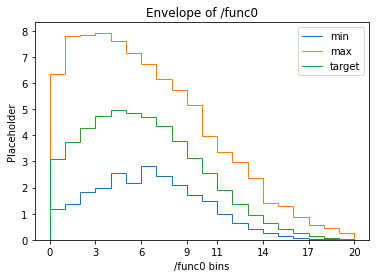

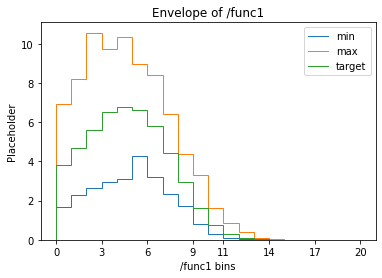

In [2]:
dummy_tune_cov.graph_envelope_target()

In [3]:
import matplotlib.pyplot as plt
cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
dummy_tune.graph_chi2_sample('dummy_data/inputdata.h5', num_samples=100, sample_prop = 0.71,
 color = cycle_colors[0], save_file = 'dummy_data/chi2results_no_err.json')
dummy_tune_cov.graph_chi2_sample('dummy_data/inputdata.h5', num_samples=100, sample_prop = 0.71,
 color = cycle_colors[1], save_file = 'dummy_data/chi2results_cov.json', new_figure = False,
 save_figure = "dummy_data/chi2_graph.pdf")

Tuning with 100 samples of size 30 out of 42
Sample 0 Tuned: [ 1.48958108 -0.99305511] | chi2/ndf: 18.38815277434923       
Sample 1 Tuned: [ 1.49603395 -0.99422521] | chi2/ndf: 14.434101784977912      
Sample 2 Tuned: [ 1.48572326 -0.993033  ] | chi2/ndf: 16.016142480311796      
Sample 3 Tuned: [ 1.48555803 -0.99767068] | chi2/ndf: 22.08318803831004       
Sample 4 Tuned: [ 1.48044591 -0.99459312] | chi2/ndf: 12.159778829098931      
Sample 5 Tuned: [ 1.48669433 -0.99395991] | chi2/ndf: 15.286100147105584      


KeyboardInterrupt: 

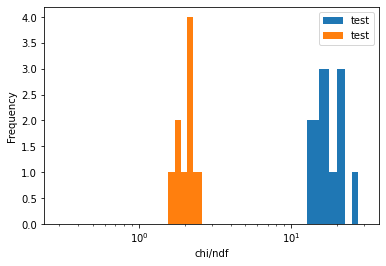

In [ ]:
plt.figure()
plt.ylabel("Frequency")
plt.xlabel("chi/ndf")
plt.xscale('log')

graph_range = [0.3, 30]
num_bins = 50
chi2ndf = [21.1,17.3,16.9,22.5,16.1,26.7,14.9,13.3,20.7,19.9]
plt.hist(chi2ndf, bins = 'doane', label = "test",  range = graph_range, facecolor = cycle_colors[0])
chi2ndf = [2.07,1.58,1.79,2.18,1.88,2.09,2.48,2.24,2.34,2.09]
plt.hist(chi2ndf, bins = 'doane', label = "test", range = graph_range, facecolor = cycle_colors[1])
plt.legend()


In [ ]:
import json
results = {}
results['chi2ndf'] = chi2ndf
results['p_opt'] = [1, 2]
json_results = json.dumps(results)
json_results

'{"chi2ndf": [2.07, 1.58, 1.79, 2.18, 1.88, 2.09, 2.48, 2.24, 2.34, 2.09], "p_opt": [1, 2]}'

'\n1x\n [[8.29169943e-05 1.40898690e-05]\n [1.40898690e-05 4.01315296e-05]]\n200x\n [[8.34164622e-05 1.41109028e-05]\n [1.41109028e-05 4.01234762e-05]]\n1000x\n [[8.35000702e-05 1.41587722e-05]\n [1.41587722e-05 4.02531556e-05]]\n\n'

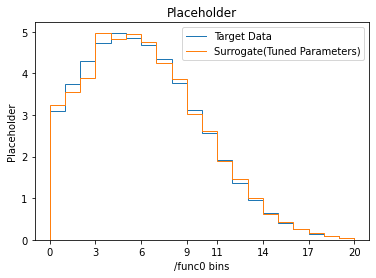

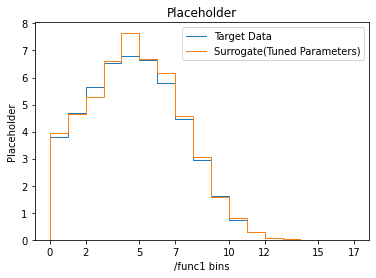

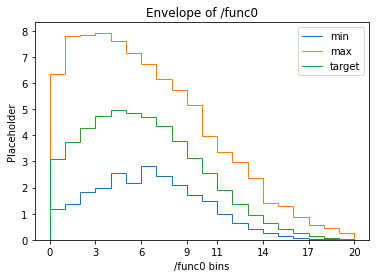

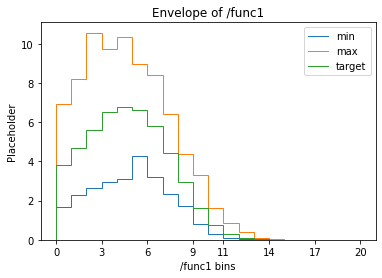

In [ ]:
dummy_tune.graph_tune('/func0')
dummy_tune.graph_tune('/func1')
dummy_tune.graph_envelope_target()
"""
1x
 [[8.29169943e-05 1.40898690e-05]
 [1.40898690e-05 4.01315296e-05]]
200x
 [[8.34164622e-05 1.41109028e-05]
 [1.41109028e-05 4.01234762e-05]]
1000x
 [[8.35000702e-05 1.41587722e-05]
 [1.41587722e-05 4.02531556e-05]]

"""